# Module 6. Labs regression analysis

## Exercise 1: Relation between heart weight and body weight in Cats

### Part 1

Perform a linear regression analysis on the variables body weight (`Bwt`, dependent variable) and heart weight (`Hwt`, independent variabele).


1. Import the dataset `Cats.csv`.


In [350]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz
from sklearn.linear_model import LinearRegression

In [351]:
cats = pd.read_csv('../data/cats.csv')
# Show the first few records of the Data Frame
cats.head()

,ID,Sex,Hwt,Bwt
0,1,F,2.0,7.0
1,2,F,2.0,7.4
2,3,F,2.0,9.5
3,4,F,2.1,7.2
4,5,F,2.1,7.3


2. Draw a scatter plot of both variables.


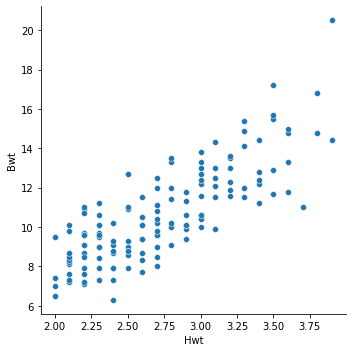

In [352]:
sns.relplot(data=cats, x='Hwt', y='Bwt')

3. Calculate and draw the regression line.


In [353]:
cats_x = cats.Hwt.values.reshape(-1,1)
cats_y = cats.Bwt

weight_model = LinearRegression().fit(cats_x, cats_y)

print(f"Regression line: ŷ = {weight_model.coef_[0]:.2f} x + {weight_model.intercept_:.2f}")

Regression line: ŷ = 4.03 x + -0.35


<AxesSubplot:xlabel='Hwt', ylabel='Bwt'>

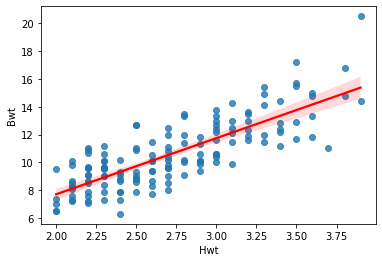

In [354]:
sns.regplot(x=cats.Hwt, y=cats.Bwt, line_kws={"color":"red"})

4. Calculate the correlation coefficient and the coefficient of determination.

In [355]:
cor = np.corrcoef(cats.Hwt, cats.Bwt)[0][1]
print(f"R = {cor}")

print(f"R² = {cor ** 2}")

R = 0.804134787315513
R² = 0.6466327561709654


5. Interpret the results from the previous steps.

Bwt (dep var) is voor 64% afhankelijk van Hwt (indep var)


### Part 2

1. Perform a linear regression analysis on the variables body weight (`Bwt`) and heart weight (`Hwt`), but this time **subdivided by gender** (`Sex`). Use the same dataset (`Cats.csv`).


2. Draw a scatter plot of both variables for each gender.


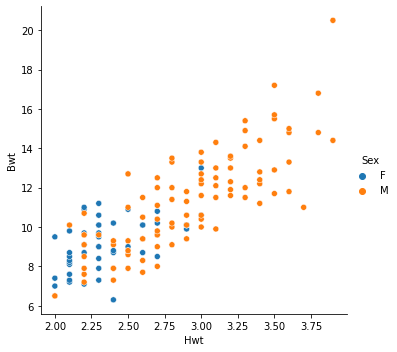

In [356]:
sns.relplot(data=cats, x='Hwt', y='Bwt', hue='Sex')

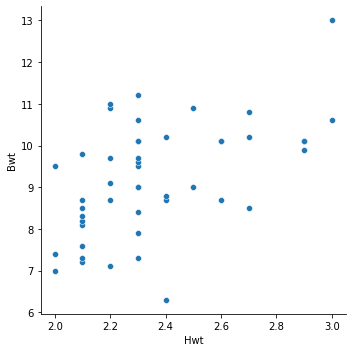

In [357]:
catsF=cats[cats.Sex == 'F']
sns.relplot(data=catsF, x='Hwt', y='Bwt')

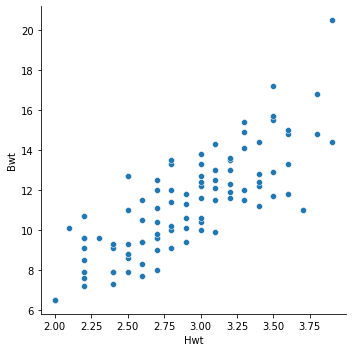

In [358]:
catsM=cats[cats.Sex == 'M']
sns.relplot(data=catsM, x='Hwt', y='Bwt')

3. Calculate and draw the regression line.


<AxesSubplot:xlabel='Hwt', ylabel='Bwt'>

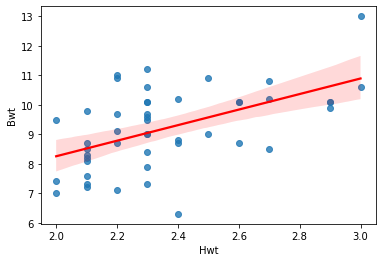

In [359]:
sns.regplot(x=catsF.Hwt, y=catsF.Bwt, line_kws={"color":"red"})

<AxesSubplot:xlabel='Hwt', ylabel='Bwt'>

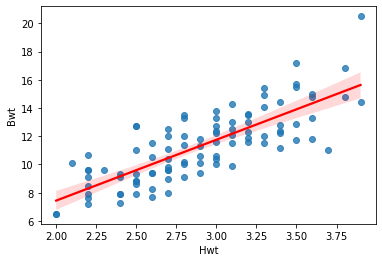

In [360]:
sns.regplot(x=catsM.Hwt, y=catsM.Bwt, line_kws={"color":"red"})

4. Calculate the correlation coefficient and the coefficient of determination.


In [361]:
corM = np.corrcoef(catsM.Hwt, catsM.Bwt)[0][1]
print(f"Male:")
print(f"R = {corM}")
print(f"R² = {corM ** 2}")
corF = np.corrcoef(catsF.Hwt, catsF.Bwt)[0][1]
print(f"Female:")
print(f"R = {corF}")
print(f"R² = {corF ** 2}")

Male:
R = 0.7930443171812304
R² = 0.628919289013444
Female:
R = 0.5320496665060397
R² = 0.28307684762918806


5. Interpret the results from the previous steps.

### Answers

| Selection |  $\beta_0$ | $\beta_1$ |       $R$ |     $R^2$ |
| :-------- | ---------: | --------: | --------: | --------: |
| All       | -0.3510784 | 4.0317575 | 0.8041348 | 0.6466328 |
| Male      | -1.1768253 | 4.3098189 | 0.7930443 | 0.6289193 |
| Female    |  2.9813124 |  2.636414 | 0.5320497 | 0.2830768 |


## Exercise 2: Vlaamse land en tuinbouwbedrijven

1. Use the dataset Landbouw Vlaanderen. The file contains data about farms in Vlaanderen

Source: Departement Landbouw en Visserij op basis StatBel

In [362]:
landbouw = pd.read_csv('../data/Landbouw Vlaanderen.csv', delimiter = ";")
# Show the first few records of the Data Frame
landbouw.head()

,jaar,aantal land en tuinbouwbedrijven,gemiddelde oppervlakte per bedrijf (ha)
0,1980,75706,"8,38"
1,1981,73292,"8,58"
2,1982,71255,"8,79"
3,1983,69807,"8,94"
4,1984,68083,"9,15"


2. What are the datatypes for each of the columns.

In [363]:
landbouw.dtypes

jaar                                        int64
aantal land en tuinbouwbedrijven            int64
gemiddelde oppervlakte per bedrijf (ha)    object
dtype: object

3. Change the datatype of 'gemiddelde oppervlakte per bedrijf (ha)' to float.

In [364]:
landbouw['gemiddelde oppervlakte per bedrijf (ha)'] = landbouw['gemiddelde oppervlakte per bedrijf (ha)'].str.replace(',','.').astype(float)

4. Draw a scatter plot of the number of farms versus the year.


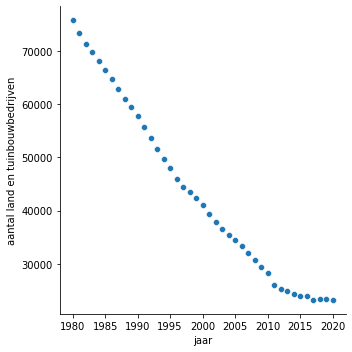

In [365]:
sns.relplot(data=landbouw, x='jaar', y='aantal land en tuinbouwbedrijven')

5. Is there a positive / negative relationship between jaar and 'aantal land en tuinbouwbedrijven'?

R = -0.9861066349492859

Negatief de grafiek daalt / R is negatief


6. Is there a strong relationship between jaar and 'aantal land en tuinbouwbedrijven'?

R² = 0.9724062954910041

Yes, R²~= 1


7. Draw a scatter plot of the 'gemiddelde oppervlakte per bedrijf (ha)' versus the year.

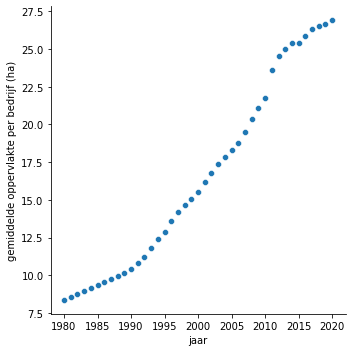

In [366]:
sns.relplot(data=landbouw, x='jaar', y='gemiddelde oppervlakte per bedrijf (ha)')

8. What will be the 'gemiddelde oppervlakte per bedrijf (ha)' in 2035?

Gemiddelde oppervlakte in 2035 = 34.91987804878045

In [367]:
landbouw_x = landbouw.jaar.values.reshape(-1,1)
landbouw_y = landbouw['gemiddelde oppervlakte per bedrijf (ha)']

model = LinearRegression().fit(landbouw_x, landbouw_y)

print(f"Regression line: ŷ = {model.coef_[0]:.2f} x + {model.intercept_:.2f}")
calc = model.coef_[0] * 2035 + model.intercept_
print(f"Gem opp/bedr (2035): {calc}")

Regression line: ŷ = 0.52 x + -1031.90
Gem opp/bedr (2035): 34.91987804878045


9. Calculate the total agricultural area for each year.   
Calculate for each year the change of the total area relative to 1980.  
Make a plot.

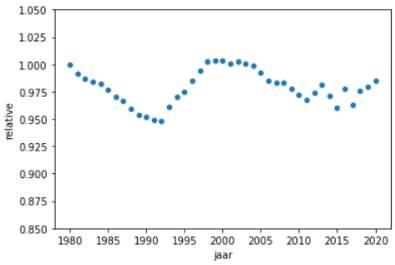


In [368]:
landbouw['totaal opp']=landbouw['aantal land en tuinbouwbedrijven'] * landbouw['gemiddelde oppervlakte per bedrijf (ha)']
opp80 = landbouw.iloc[0, 3]
help2 = landbouw[landbouw.jaar == 1980]['totaal opp']
print(opp80, help2)
landbouw['rel to \'80']= landbouw['totaal opp']/opp80


634416.28 0    634416.28
Name: totaal opp, dtype: float64


(0.85, 1.05)

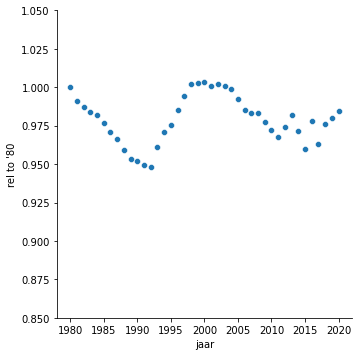

In [369]:
sns.relplot(data=landbouw, x='jaar', y='rel to \'80')
plt.ylim(0.85, 1.05)

## Exercise 3: Movies of 2006 and 2007

1. The file Movies_2006_2007 contains information on over 200
movies that were released during 2006 and 2007.

In [370]:
movies = pd.read_csv('../data/Movies_2006_2007.csv', delimiter = ";", encoding='cp1252')
# Show the first few records of the Data Frame
movies.head()

,Index,Movie,Distributor,Genre,7-day Gross,14-day Gross,Total US Gross,International Gross,US DVD Sales,Budget
0,1.0,The Texas Chainsaw Massacre: The Beginning,New Line,Horror,$22 707 121,$32 109 139,$39 517 763,$11 000 000,$15 909 367,$16 000 000
1,2.0,Year of the Dog,Paramount Vantage,Drama,$141 803,$318 598,$1 540 141,NaN,NaN,NaN
2,3.0,War,Lionsgate,Action,$12 839 402,NaN,$22 466 994,$18 200 000,$27 040 983,$25 000 000
3,4.0,Stomp the Yard,Sony Pictures,Drama,$28 263 594,$42 853 277,$61 356 221,$15 000 000,$33 166 898,$14 000 000
4,5.0,The Illusionist,Freestyle Releasing,Drama,NaN,NaN,$39 868 642,$44 407 533,$38 189 217,$16 500 000


2. Use cols_with_dollars to transform the amounts in dollars into floats, e.g. $22 707 121	becomes 22707121.  
For ease of use, change the values into 'million dollar' - values.

In [371]:
cols_with_dollars = ['7-day Gross',	'14-day Gross',	'Total US Gross',	'International Gross',	'US DVD Sales',	'Budget']

In [372]:
for c in cols_with_dollars:
    movies[c]=movies[c].str.replace('$','').str.replace(' ','').astype(float)/1000000
# movies=movies.dropna()

movies.head()

C:\Users\jonad\AppData\Local\Temp\ipykernel_17196\3616570861.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movies[c]=movies[c].str.replace('$','').str.replace(' ','').astype(float)/1000000


,Index,Movie,Distributor,Genre,7-day Gross,14-day Gross,Total US Gross,International Gross,US DVD Sales,Budget
0,1.0,The Texas Chainsaw Massacre: The Beginning,New Line,Horror,22.707121,32.109139,39.517763,11.000000,15.909367,16.0
1,2.0,Year of the Dog,Paramount Vantage,Drama,0.141803,0.318598,1.540141,NaN,NaN,NaN
2,3.0,War,Lionsgate,Action,12.839402,NaN,22.466994,18.200000,27.040983,25.0
3,4.0,Stomp the Yard,Sony Pictures,Drama,28.263594,42.853277,61.356221,15.000000,33.166898,14.0
4,5.0,The Illusionist,Freestyle Releasing,Drama,NaN,NaN,39.868642,44.407533,38.189217,16.5


3. Create two scatterplots: one of Total US Gross (Y) versus
7-day Gross (X) and one of Total US Gross (Y)
versus 14-day Gross (X).

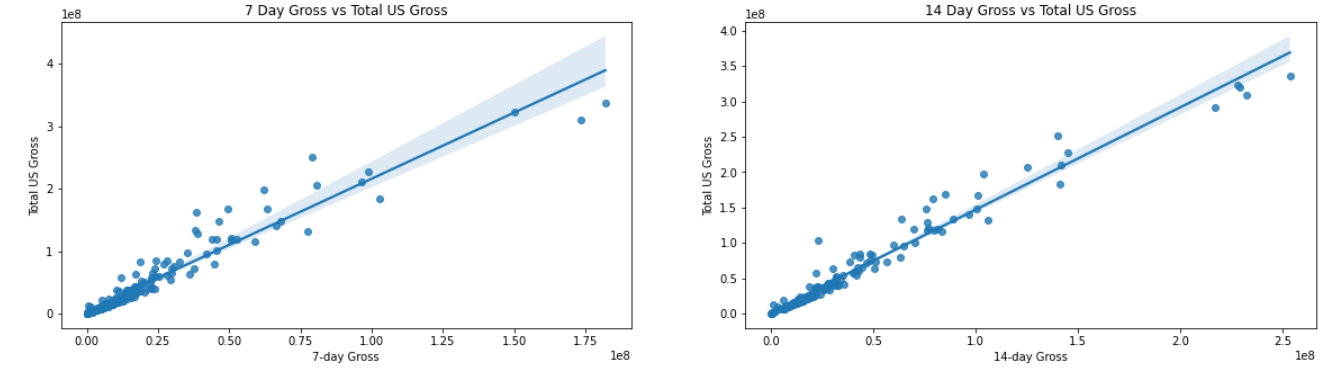

C:\Users\jonad\AppData\Local\Temp\ipykernel_17196\3862436372.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


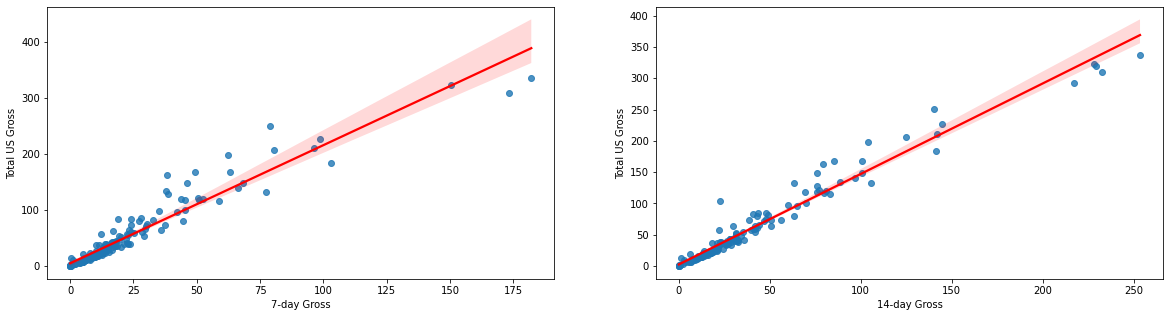

In [373]:
fig, ax =plt.subplots(1,2, figsize=(20, 5))
sns.regplot(x=movies['7-day Gross'], y=movies['Total US Gross'], line_kws={"color":"red"}, ax=ax[0])
sns.regplot(x=movies['14-day Gross'], y=movies['Total US Gross'], line_kws={"color":"red"}, ax=ax[1])

fig.show()

4. What are the corresponding
values for $R$ and $R^2$?

R (7 Day Gross vs Total US Gross) = 0.959407544414305  
R² (7 Day Gross vs Total US Gross) = 0.9204628362790865  
R (14 Day Gross vs Total US Gross) = 0.9813238689021966  
R² (14) Day Gross vs Total US Gross) = 0.9629965356771755

In [374]:
# movies=movies.dropna(subset=['7-day Gross']) FOUT! -> Verwijderd goede 14-days
# movies=movies.dropna(subset=['14-day Gross']) FOUT! -> Verwijderd goede 7-days
# gross_days_7= movies[~(movies['7-day Gross'].isnull())]
# gross_days_14= movies[~(movies['14-day Gross'].isnull())]
gross_days_7=movies.dropna(subset=['7-day Gross'])
gross_days_14=movies.dropna(subset=['14-day Gross'])

cor7 = np.corrcoef(gross_days_7['7-day Gross'], gross_days_7['Total US Gross'])[0][1]
print(f"7-day:")
print(f"R = {cor7}")
print(f"R² = {cor7 ** 2}")
cor14 = np.corrcoef(gross_days_14['14-day Gross'], gross_days_14['Total US Gross'])[0][1]
print(f"14-day:")
print(f"R = {cor14}")
print(f"R² = {cor14 ** 2}")

7-day:
R = 0.9594075444143062
R² = 0.920462836279089
14-day:
R = 0.9813238689021968
R² = 0.9629965356771759


5. What are the equations of the linear regression lines in the previous part?  
What exactly does intercept and slope tell you about the movie business?

7 days gross: ŷ = 4590921.233818144 + 2.1134647566101816 * x  
14 days gross: ŷ = 2449002.8925510645 + 1.44645307025908 * x

In [376]:
movies_x = gross_days_7['7-day Gross'].values.reshape(-1,1)
movies_y = gross_days_7['Total US Gross']

model = LinearRegression().fit(movies_x, movies_y)

print(f"Regression line (7): ŷ = {model.coef_[0]:.2f} x + {model.intercept_:.2f}")

movies_x = gross_days_14['14-day Gross'].values.reshape(-1,1)
movies_y = gross_days_14['Total US Gross']

model = LinearRegression().fit(movies_x, movies_y)

print(f"Regression line (14): ŷ = {model.coef_[0]:.2f} x + {model.intercept_:.2f}")



Regression line (7): ŷ = 2.11 x + 4.59
Regression line (14): ŷ = 1.45 x + 2.45


6. In the previous scatterplots you can see some ouliers at the right side. These are movies that did great
during their first week or two. 
* What are these outliers? 
* Remove them out of the dataset (you can decide how many qualify).
* Give the new values for $R$ and $R^2$.
* Give the new values for the slope and the intercept of the regression lines. Do the outliers have a great effect?

In [378]:
# gross_days_7['7-day Gross'].describe()['75%'] + 1.5 * (gross_days_7['7-day Gross'].describe()['75%']-gross_days_7['7-day Gross'].describe()['25%'])
q1 = gross_days_7['7-day Gross'].quantile(0.25)
q2 = gross_days_7['7-day Gross'].quantile(0.75)
grenswaarde = q2 + 1.5 * (q2 - q1)